<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.shape

(506, 14)

In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [9]:
boston_df["AGE"].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In [10]:
boston_df["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

<AxesSubplot:title={'center':'Median value of owner-occupied homes'}, ylabel='MEDV'>

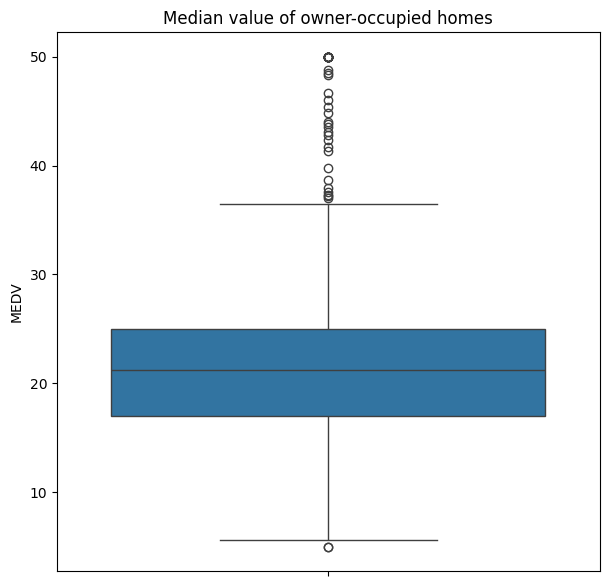

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,7)) 
plt.title("Median value of owner-occupied homes")
sns.boxplot(y = boston_df["MEDV"])

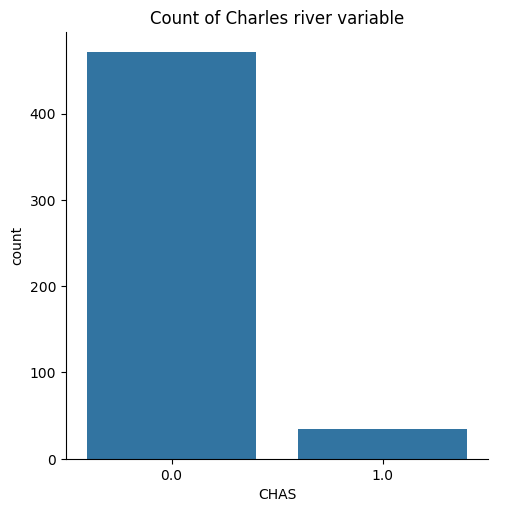

In [13]:
ax = sns.catplot(x = "CHAS", kind ="count", data = boston_df)
ax.set(xlabel='CHAS', ylabel='count', title = "Count of Charles river variable")

The chart shows that more people live far from Charles river. Less than 100 people resides near Charles river.

In [14]:
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[(boston_df["AGE"] <= 35), "AGE_GROUP"] = "35 years and younger"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "AGE_GROUP"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"] >= 70), "AGE_GROUP"] = "70 years and older"

<AxesSubplot:title={'center':'MEDV variable vs the AGE variable'}, xlabel='MEDV', ylabel='AGE_GROUP'>

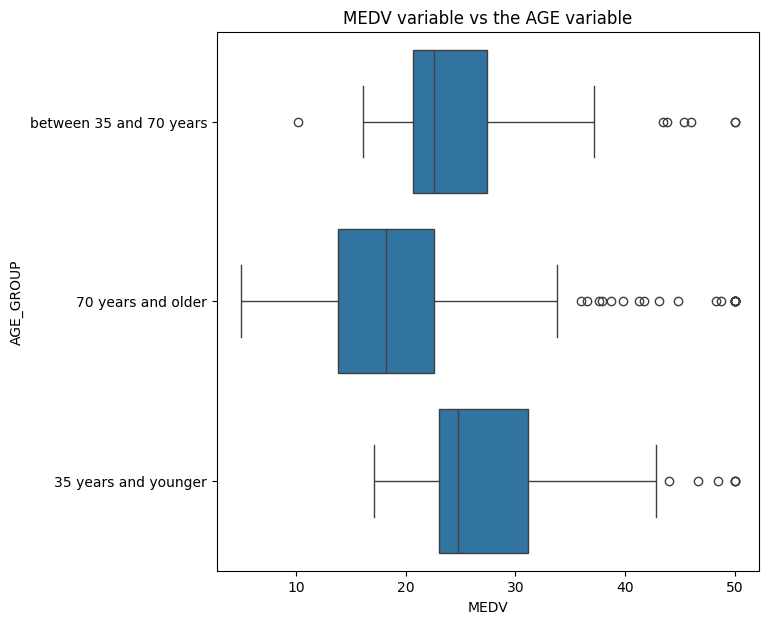

In [15]:
#Provide a boxplot for the MEDV variable vs the AGE variable
plt.figure(figsize=(7,7))
plt.title("MEDV variable vs the AGE variable")
sns.boxplot(x= "MEDV", y= "AGE_GROUP", data = boston_df)

The boxplot above shows that on average the median value of owner occupied homes is higher when the Age is lower

[Text(0.5, 0, 'Nitric Oxide Concentration'),
 Text(0, 0.5, 'Non-Retail Business Acres per Town'),
 Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres per town')]

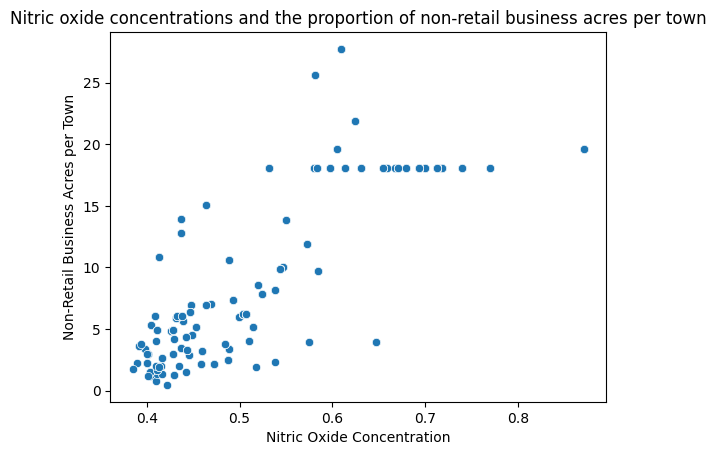

In [16]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
ax.set(xlabel='Nitric Oxide Concentration', ylabel='Non-Retail Business Acres per Town', title='Nitric oxide concentrations and the proportion of non-retail business acres per town')

The NOX is positively correlated to INDUS. The graph show the increase in Nitric Oxide concentration as there is increase in non-retail business, but once the non retail business is greater than 15 the Nitric Oxide concentration become constant.

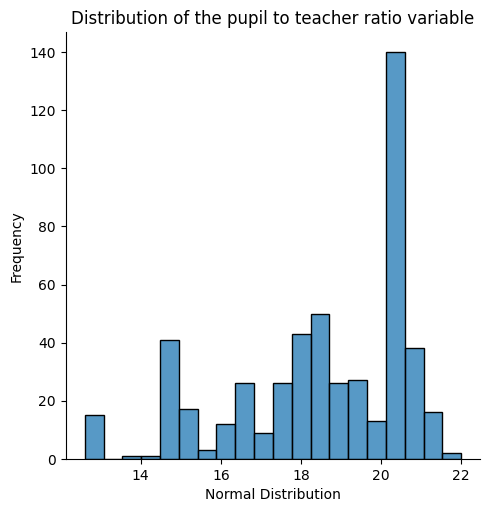

In [17]:
# Create a histogram for the pupil to teacher ratio variable
ax = sns.displot(x = boston_df["PTRATIO"], bins = 20, kde = False)
ax.set(xlabel='Normal Distribution', ylabel='Frequency', title = "Distribution of the pupil to teacher ratio variable")

The graph shows the distribution is left skewed distribution.

### Task 3

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the Hypothesis
H_0 : µ_1 = µ_2 (There is no significant difference in median values of houses bounded by the Charles river)

H_1: µ_1 ≠ µ_2 (There is significant difference in median values of houses bounded by the Charles river)

Assumption 1: One independent, categorical variable with two levels or group, the independent variable is CHAS, but it is numerical variable. So, we need to convert it to categorical variables

In [22]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'

<ipython-input-23-49a083ec6f2d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x = boston_df["MEDV"], bins = 20, kde = True)


[Text(0.5, 0, 'Normal Distribution'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of dependent variable (MEDV)')]

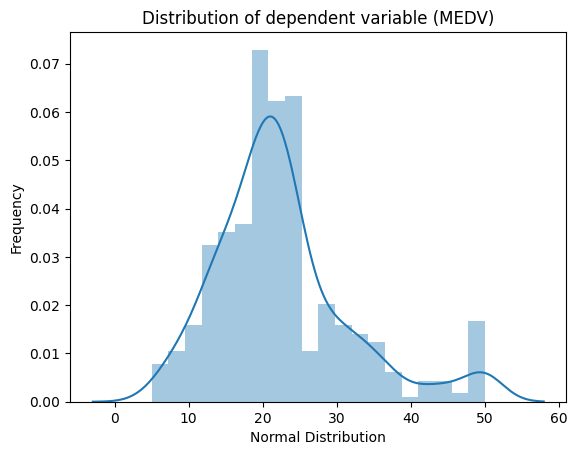

In [23]:
# We can plot the dependent variable with a historgram
ax = sns.distplot(x = boston_df["MEDV"], bins = 20, kde = True)
ax.set(xlabel='Normal Distribution', ylabel='Frequency', title='Distribution of dependent variable (MEDV)')

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the Hypothesis:
H_0: µ_1=µ_2=µ_3 (the three population means are equal) i.e. There is no significant difference in mean of Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

H_1: At least one of the means differ. i.e. There is significant difference in mean of Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

In [24]:
boston_df.loc[(boston_df["AGE"] <= 35), "AGE_GROUP"] = "35 years and younger"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "AGE_GROUP"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"] >= 70), "AGE_GROUP"] = "70 years and older"

State the Hypothesis:
H_0: Equality of variance

H_1: Atleast one variance is not equal

In [25]:
# Test for equality of variance
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Note:
The p value is greater than alpha i.e. 0.06>0.05. So, we fail to reject the null hypothesis i.e. Eqaulity of variance

In [26]:
thirtyfive_lower   = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older      = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

In [27]:
# One way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Result:
The p-value is less than alpha (0.05) So, we need to reject the null hypothesis. i.e. There is significant difference in mean of Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the Hypothesis:
H_0: There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

H_1: There is significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

[Text(0.5, 0, 'Nitric Oxide Concentration'),
 Text(0, 0.5, 'Non-Retail Business Acres per Town'),
 Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres per town')]

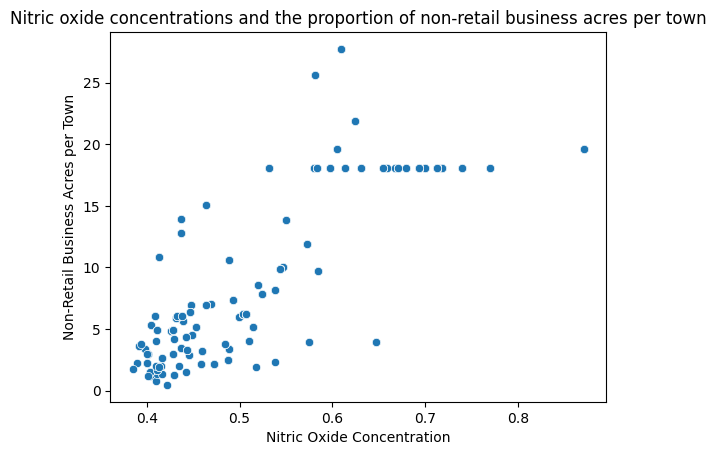

In [28]:
ax = sns.scatterplot(x = "NOX", y = "INDUS", data = boston_df)
ax.set(xlabel='Nitric Oxide Concentration', ylabel='Non-Retail Business Acres per Town', title='Nitric oxide concentrations and the proportion of non-retail business acres per town')

In [29]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Result:
Since the p-value is less than alpha(0.05). We need to reject the null hypothesis. i.e. There is significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the Hypothesis:
H_0: Weighted distance to the five Boston employment centres on the median value of owner occupied homes are not correlated.

H_1: Weighted distance to the five Boston employment centres on the median value of owner occupied homes are correlated.

In [30]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        21:58:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Result:
Since the p-value is less than alpha(0.05), we reject the null hypothesis. i.e. Weighted distance to the five Boston employment centres on the median value of owner occupied homes are correlated.